In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:/Toxic Comments/Cleaning the data/cleaned.csv" , encoding="latin-1")

In [3]:
df.head(20)

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,1,000103f0d9cfb60f,d'aww! matches background colour i'm seemingly...,0,0,0,0,0,0
2,2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0
3,3,0001b41b1c6bb37e,""" can't make real suggestions improvement - wo...",0,0,0,0,0,0
4,4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0
5,5,00025465d4725e87,""" congratulations well, use tools well. Ã¢ Ã¢Â...",0,0,0,0,0,0
6,6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0
7,7,00031b1e95af7921,vandalism matt shirvington article reverted. p...,0,0,0,0,0,0
8,8,00037261f536c51d,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,0,0,0
9,9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0


Train_Test_Validation split

In [4]:
x_train , x_split , y_train , y_split = train_test_split(df["comment_text"] , 
                                df[["toxic" , "severe_toxic" , "obscene" , "threat" , "insult" , "identity_hate"]] , 
                                test_size= 0.3 , random_state=42)

In [5]:
x_test , x_val , y_test , y_val  = train_test_split( x_split, y_split, test_size= 0.5, random_state=42)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(111699,)
(23936,)
(23936,)
(111699, 6)
(23936, 6)
(23936, 6)


Text vectorizer

In [7]:
round(sum([len(i.split()) for i in x_train])/len(x_train))

37

average number of words in a sentence as per our data is 37 , there fore we will use 50

In [8]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [9]:
text_vec = TextVectorization(max_tokens= None , output_mode= 'int' , output_sequence_length= 55 , standardize= "lower_and_strip_punctuation" , split="whitespace")
text_vec

In [10]:
text_vec.adapt(x_train)

In [11]:
x_test[39]

"notability rurika kasuga tag placed rurika kasuga, requesting speedily deleted wikipedia. done article seems person, group people, band, club, company, web content, indicate subject notable, is, article subject included wikipedia. criteria speedy deletion, articles assert notability may deleted time. please see guidelines generally accepted notable, indicate subject article notable, may contest tagging. this, add top page (below existing db tag) leave note article's talk page explaining position. please remove speedy deletion tag yourself, hesitate add information article would confirm subject's notability guidelines. guidelines specific types articles, may want check criteria biographies, web sites, bands, companies. feel free leave note talk page questions this."

Embedding Layer

In [12]:
embed = keras.layers.Embedding (input_dim=50000, 
                                output_dim=128, 
                                embeddings_initializer="uniform", 
                                input_length=55,
                                name="embedding_1")

In [13]:
embed

Training a Vannila RNN for classifing the sentiment

In [14]:
from tensorflow.keras import layers

In [ ]:
input = layers.Input(shape=(1,0), dtype="string")

tv = text_vec (input)

em = embed(tv)

rnn = layers.SimpleRNN(64 , kernel_initializer= keras.initializers.RandomNormal(stddev=0.0001) ,
                         recurrent_initializer = keras.initializers.Identity(gain=1.0))(em)

drop1 = layers.Dropout(0.2)(rnn)  

dense1 = layers.Dense(32 , activation="relu")(drop1)

drop2 = layers.Dropout(0.2)(dense1)

dense2 = layers.Dense(32 , activation="relu")(drop2)

output1 = layers.Dense(1 , activation="sigmoid" , name = "toxic")(dense2)
output2 = layers.Dense(1 , activation="sigmoid" , name = "severe_toxic")(dense2)
output3 = layers.Dense(1 , activation="sigmoid" , name = "obscene")(dense2)
output4 = layers.Dense(1 , activation="sigmoid" , name = "threat")(dense2)
output5 = layers.Dense(1 , activation="sigmoid" , name = "insult")(dense2)
output6 = layers.Dense(1 , activation="sigmoid" , name = "identity_hate")(dense2)

model_rnn = keras.Model(inputs= input , outputs = [output1,output2,output3,output4,output5,output6] , name = 'vannila_rnn')


In [16]:
model_rnn.summary()

Model: "vannila_rnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 55)          0           ['input_1[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding_1 (Embedding)        (None, 55, 128)      6400000     ['text_vectorization[0][0]']     
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 64)           12352       ['embedding_1[0][0]']  

In [17]:
from tensorflow.keras.utils import plot_model

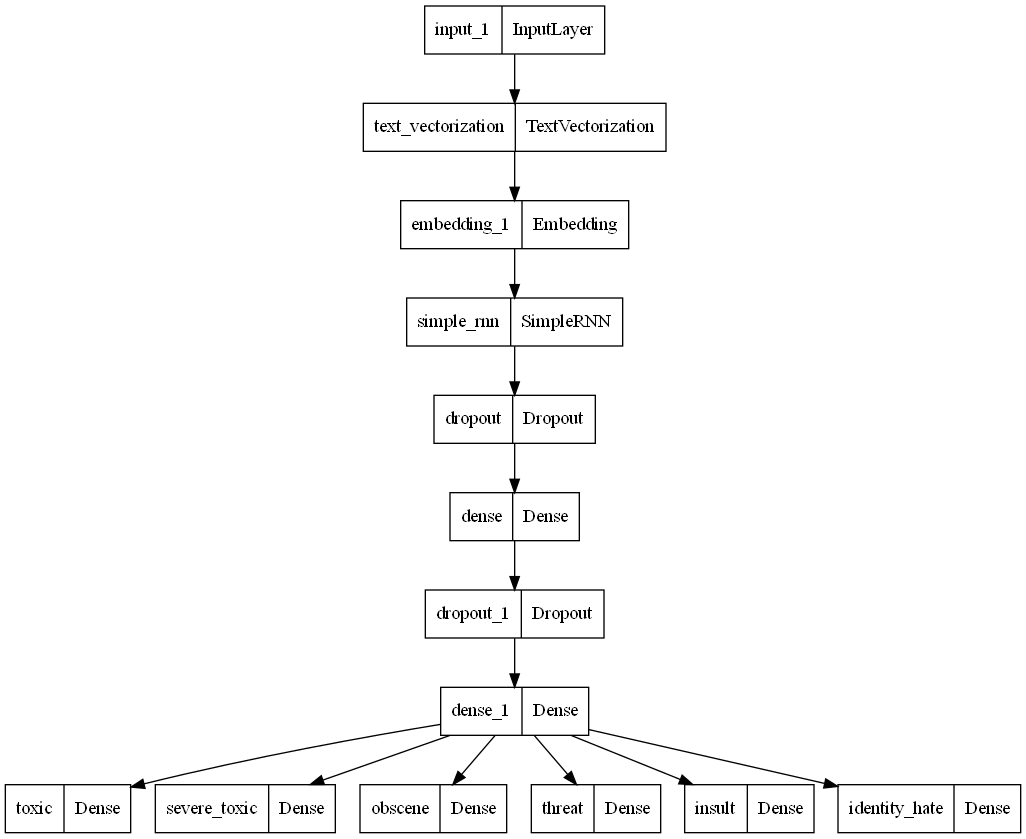

In [18]:
plot_model(model_rnn)

In [26]:
model_rnn.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5)  ,
                     loss = ['binary_crossentropy' , 'binary_crossentropy' , 'binary_crossentropy' , 
                     'binary_crossentropy' , 'binary_crossentropy' , 'binary_crossentropy'] , metrics='accuracy')

In [27]:
model_rnn.fit(x = x_train , y = [y_train.toxic , y_train.severe_toxic , y_train.obscene 
                                    , y_train.threat , y_train.insult , y_train.identity_hate] ,
                batch_size=32, epochs=15,
                 validation_data=(x_val , [ y_val.toxic , y_val.severe_toxic , y_val.obscene 
                                            , y_val.threat , y_val.insult , y_val.identity_hate]))

Epoch 1/15
3491/3491 [==============================] - 354s 101ms/step - loss: 1.0977 - toxic_loss: 0.3097 - severe_toxic_loss: 0.1475 - obscene_loss: 0.2321 - threat_loss: 0.0979 - insult_loss: 0.2255 - identity_hate_loss: 0.0851 - toxic_accuracy: 0.9035 - severe_toxic_accuracy: 0.9589 - obscene_accuracy: 0.9277 - threat_accuracy: 0.9806 - insult_accuracy: 0.9358 - identity_hate_accuracy: 0.9905 - val_loss: 0.8757 - val_toxic_loss: 0.2966 - val_severe_toxic_loss: 0.0856 - val_obscene_loss: 0.1980 - val_threat_loss: 0.0493 - val_insult_loss: 0.1915 - val_identity_hate_loss: 0.0548 - val_toxic_accuracy: 0.9031 - val_severe_toxic_accuracy: 0.9897 - val_obscene_accuracy: 0.9460 - val_threat_accuracy: 0.9972 - val_insult_accuracy: 0.9491 - val_identity_hate_accuracy: 0.9906
Epoch 2/15
3491/3491 [==============================] - 353s 101ms/step - loss: 0.8217 - toxic_loss: 0.2978 - severe_toxic_loss: 0.0567 - obscene_loss: 0.1985 - threat_loss: 0.0285 - insult_loss: 0.1871 - identity_hate

In [30]:
model_rnn.save("model_rnn.tf")

INFO:tensorflow:Assets written to: model_rnn.tf\assets


In [32]:
import matplotlib.pyplot as plt

In [47]:
def plot_hist(hist):
    plt.plot(hist.history.history["loss"])
    plt.plot(hist.history.history["val_loss"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

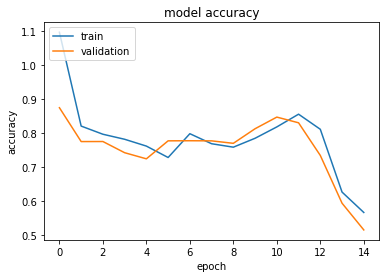

In [48]:
plot_hist(model_rnn)

In [52]:
pred = model_rnn.predict(x_test)

In [56]:
Result = model_rnn.evaluate(x_test, [ y_test.toxic , y_test.severe_toxic , y_test.obscene 
                                            , y_test.threat , y_test.insult , y_test.identity_hate])

748/748 [==============================] - 12s 16ms/step - loss: 0.5075 - toxic_loss: 0.1894 - severe_toxic_loss: 0.0343 - obscene_loss: 0.1148 - threat_loss: 0.0189 - insult_loss: 0.1112 - identity_hate_loss: 0.0389 - toxic_accuracy: 0.9365 - severe_toxic_accuracy: 0.9900 - obscene_accuracy: 0.9468 - threat_accuracy: 0.9971 - insult_accuracy: 0.9511 - identity_hate_accuracy: 0.9914
